<font color='blue'> Привет. Ниже мои комментарии выделены синим. </font>

### Описание проекта
#### Контекст
Вы — аналитик крупного интернет-магазина.   
Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.  
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Описание данных
#### Данные для первой части  
Файл `/datasets/hypothesis.csv`  
`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  


#### Данные для второй части
Файл `/datasets/orders.csv`  
`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.  


Файл `/datasets/visitors.csv`  
`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Часть 1. Приоритизация гипотез.


В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами 
- Reach, 
- Impact, 
- Confidence, 
- Effort.


#### Задача
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
1. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
1. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Загрузим необходимые библиотеки

In [31]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

Посмотрим, что в данных

In [8]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Посмотрим полный текст гипотез

In [9]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Приведем названия столбцов к нижнему регистру

In [10]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [14]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [13]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


### Вывод: приоритизация гипотез при применении RICE вместо ICE изменилась.

При применении ICE самые перспективные гипотезы - `8`, `0`, `7` и `6`.  
Однако при применении RICE приоритеты поменялись - `7`, `2`, `0` и `6` - очевидно, что первый фреймворк не учитывает параметр Reach — скольких пользователей затронет изменение, которое мы хотим внести. Для принятия решения, какую гипотезу применить, необходимо все же пользоваться RICE - здесь учитываются пользователи

<font color='blue'> Хорошо, параметры ирассчитаны и проанализированы верно. Только ICE для удобства лучше отформатировать до 1-2 знаков после запятой. </font>

### Часть 2. Анализ A/B-теста


Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.  


#### Задача  


Проанализируйте A/B-тест:  
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.  
1. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.  
1. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.  
1. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.  
1. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.  
1. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.  
1. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.  
1. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.  
1. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  
1. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.  
1. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.  
1. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.  
1. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.  
1. Примите решение по результатам теста и объясните его. Варианты решений: 
  - 1. Остановить тест, зафиксировать победу одной из групп.  
  - 2. Остановить тест, зафиксировать отсутствие различий между группами. 
  - 3. Продолжить тест.

#### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [21]:
orders = pd.read_csv('/datasets/orders.csv') 
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [30]:
print('orders')
print(orders.head())
print('visitors')
print(visitors.head())

orders
   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
visitors
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [29]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cummulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


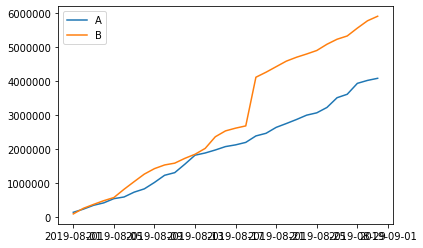

In [39]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

# убираем ошибки, которые могут появится при построении графиков
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

plt.legend()

#### Вывод: Выручка в обеих группах растет (и это хорошо). Однако в группе В есть резкий скачок (возможно есть аномалии - надо будет посмотреть очищеные данные)

<font color='blue'> Верно, только подписи не слишком читаемы. </font>

#### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

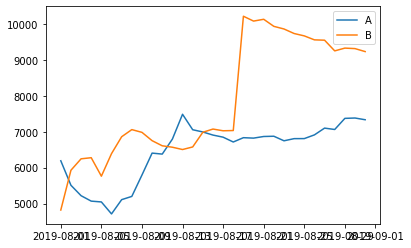

In [37]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()

#### Вывод: Средний чек тоже становится равномерным начиная с середины теста для группы A. Для группы B в середине теста есть сильный скачок, возможно связанный с аномально большим заказом или заказами. После пика средний чек начал падать. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

<font color='blue'> Хорошо. </font>

#### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

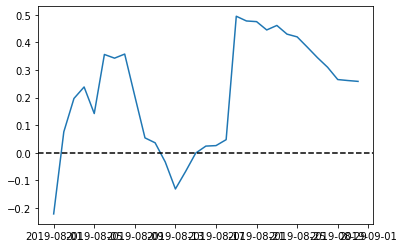

In [40]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

#### Вывод: Вначале группа В уверенно лидирует относительно группы А, затем показатель падает, а потом опять растет. В нескольких точках график различия между сегментами резко «скачет». Где-то точно есть крупные заказы и выбросы. Надо будет их найти далее.

<font color='blue'> Ок. Стоило отметить, что подобную картинцудемонстрируют/подтверждают все три графика </font>

#### 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

['2019-08-01', '2019-09-01', 0, 0.06]

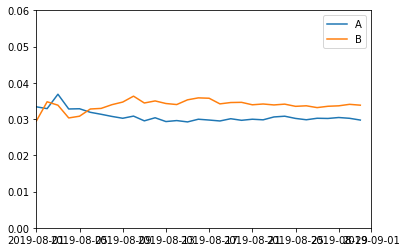

In [43]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

# строим графики
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.06])

#### Вывод: вначале в группе А конверсия была лучше, но затем достаточно быстро потеряла свои позиции и установилась на одном уровне ниже, чем у группы В. А группа В наоборот вначале уступала группе А, но затем быстро набрала обороты и зафикисровалась около одного уровня, выше, чем у группы А

<font color='blue'> Ок, здесь можно приблитзить немного график, ограничить ось интервалом 0,25-0,4. </font>

#### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

['2019-08-01', '2019-09-01', -0.6, 0.6]

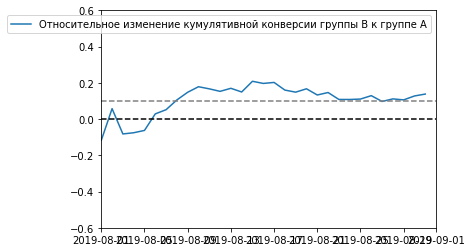

In [46]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительное изменение кумулятивной конверсии группы B к группе A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6])

#### Вывод: Вначале конверсия группы В была меньше чем у А, но затем плавно выросла, достигла пика, и постепенно о установилась около значения 0,1. В конце теста даже стала немного расти

<font color='blue'> Хорошо, аналогично, много пустого простанства, а график собственно мелковат. </font>

#### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [51]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Построим точечный график по количеству заказов

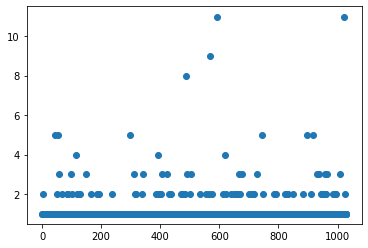

In [52]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])

#### Вывод: Есть пользователи, которые совершали 3, 4, 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь за неделю. Более детально эти аномалии можно будет отсечь 95 - 99 процентилем

#### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [53]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

#### Вывод: Не более 5% пользователей оформляли больше чем 2 заказов. И 1% пользователей заказывали более четырех раз.

Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. Удалением таких строк займёмся далее.

#### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

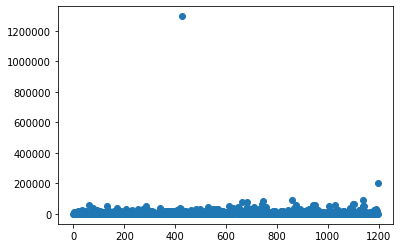

In [54]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

#### Вывод: в целом сумма заказов держится ниже 100 тысяч. При этом есть заказ стоимостью более 1,2 млн и 200 тысяч.  Более детально эти аномалии можно будет отсечь 95 - 99 процентилем

<font color='blue'> Здесь стоило отдельно отметить большой выброс, который и вызвал скачки на графиках. </font>

#### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [55]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

#### Вывод: Не более 5% заказов дороже 28 тысяч, и не более 1%  дороже 58,5 тысяч.
Для дальнейших расчетов оставим уровень заказов не более 28000

#### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [59]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Напомним названия столбцов данных:  
`date` — дата;  
`ordersPerDateA` — количество заказов в выбранную дату в группе A;  
`revenuePerDateA` — суммарная выручка в выбранную дату в группе A;  
`ordersPerDateB` — количество заказов в выбранную дату в группе B;  
`revenuePerDateB` — суммарная выручка в выбранную дату в группе B;  
`ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;  
`revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;  
`ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;  
`revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;  
`visitorsPerDateA` — количество пользователей в выбранную дату в группе A;  
`visitorsPerDateB` — количество пользователей в выбранную дату в группе B;  
`visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;  
`visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.  


Посчитаем статистическую значимость различия в конверсии между группами.    


Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.


In [60]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.


Переменная `sampleA` должна состоять из двух частей:  
Список с количеством заказов для каждого из пользователей: `ordersByUsersA['orders']`.
Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: `data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])`. 


Создадим объект `pd.Series` нужной длины:
`pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')`. 


Список индексов создали функцией `np.arange()`. Она работает так же, как функция `range()`, только создаёт массив индексов в формате `np.array`, который требуется в `pd.Series`.  
В Pandas последовательности объединяют функцией `pd.concat()` (от англ. concatenate, «сцеплять»). Сперва ей передают то, что объединяют — в нашем случае список из первой и второй части:  
`[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] `.  
Дальше передадим аргумент, сообщающий, что объекты `Series` нужно объединить по строкам (то есть записать подряд): `pd.concat([...], axis=0)`. 


То же делаем для `sampleB`.  


Применим критерий и отформатируем `p-value`, округлив его до трёх знаков после запятой.
Напомним, что в `sampleA` сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов `sampleA` — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке `sampleA` методом `mean()`. Аналогично найдём конверсию группы B: `SampleB.mean()`.  
Выведем относительный прирост конверсии группы B: `конверсия группы B / конверсия группы A - 1`. Округлим до трёх знаков после запятой.

In [61]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


#### Вывод: По «сырым» данным различия в конверсии групп A и B есть.


Первое число — `p-value = 0.008` меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. При этом относительный проигрыш группы А равен 13.8%

<font color='blue'> Верно. </font>

#### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию `mannwhitneyu()` данные о выручке с заказов.   


А ещё найдём относительные различия в среднем чеке между группами:

In [62]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


#### Вывод: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

<font color='blue'> правильно
    . </font>

#### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Напомним, что 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.  
Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 28 000.   
Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.   
Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`.  
Объединим их в таблице `abnormalUsers`.  
Узнаем, сколько всего аномальных пользователей методом `shape()`.

In [65]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


Всего 74 аномальных пользователей.  


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [66]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId']
    .isin(abnormalUsers))]
     ['orders'],pd.Series(0, index=np.arange
                          (data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))
                          ,name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId']
    .isin(abnormalUsers))]
     ['orders'],pd.Series(0, index=np.arange
                          (data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']))
                          ,name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.173


#### Вывод: По «очищенным» данным различия в конверсии групп A и B есть.
Первое число — p-value = 0.007 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. При этом относительный проигрыш группы А равен 17.3% (что больше чем в расчтах по "сырым" данным)

По "сырым" данным p-value = 0.008 и 13.8 - очистка данных привела к тому же результату

<font color='blue'> Верно. </font>

#### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Результаты по конверсии практически не изменились. Произошло ли что-нибудь с результатами по среднему чеку?

In [67]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.369
-0.020


#### Вывод: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом, средний чек группы B стал меньше среднего чека группы A на 2%.

На "сырых" данных вредний чек группы В был больше из за аномальных заказов

<font color='blue'> Хорошо, все гипот езы проверены правильно. </font>

#### 14. Примите решение по результатам теста и объясните его.   

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест.

### Тест можно останавить и признать победу группы В по следующим причинам:  
1. Конверсия у В больше, а средлний чек не отличается - значит прибыль с группы В больше  
1. Относительное изменение кумулятивной конверсии группы B к группе A зафиксировалось на уровне 0.1 - дальше можно не продолжать тестирование  

<font color='blue'> Проект выполнен отлично, молодец. </font>